# TAL aplicado al análisis del discurso de los medios de prensa 📰🤓🔥


Random forest es un algoritmo de aprendizaje supervisado. Se puede utilizar tanto para clasificación como para regresión. También es el algoritmo más flexible y fácil de usar. Random forest está compuesto por árboles. Se dice que cuantos más árboles tiene, más robusto es un bosque. Random forest crea árboles de decisión sobre muestras de datos seleccionadas al azar, obtienen predicciones de cada árbol y seleccionan la mejor solución mediante votación. También proporciona un indicador bastante bueno de la importancia de la función.



### índex

1. [Importación del dataset](a)
2. [Preprocesamiento y representación vectorial](b)
3. [Entrenamiento del modelo de clasificación](b)
4. [Evaluación del modelo de clasificación](c)

    4.4 [Matriz de confusión](d)


In [1]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [2]:
#NLP
import spacy
nlp = spacy.load("es_core_news_sm")
from spacy.lang.es.stop_words import STOP_WORDS
from spacy.lang.es import Spanish
import string

#SKLEARN
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.linear_model import LogisticRegression # Regresion Logística

# Data manipulation
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
from tqdm import tqdm


### 1. Importación del dataset


In [4]:
df = pd.read_csv("dataEtiquetada.csv")
print(df['label'].value_counts())

catástrofes y accidentes      2060
ciencia y tecnología          2060
crimen, delitos y justicia    2060
deporte                       2060
ecología y planeta            2060
economía                      2060
mundo                         2060
política y conflictos         2060
cultura y arte                2020
salud                         1928
Name: label, dtype: int64


In [10]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.5)

### 2. Preprocesamiento y representación vectorial

In [11]:
# Create our list of punctuation marks
punctuations = [".",",","!","?", "#","&"]

# Create our list of stopwords
stop_words=[""]

# Load English tokenizer, tagger, parser, NER and word vectors
parser = Spanish()

# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = parser(sentence)

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [word.lower_ for word in mytokens]
        
    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens

In [12]:
bow_vector = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1))
bow_vector

CountVectorizer(tokenizer=<function spacy_tokenizer at 0x7fa4a6544790>)

In [13]:
tfidf_vector = TfidfVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1))

### 3. Entrenamiento del modelo de clasificación

In [14]:
from sklearn.ensemble import RandomForestClassifier
modelRF = RandomForestClassifier(random_state=0)

model3 = Pipeline([('preprocessing', bow_vector),
                 ('regression-ML', modelRF)])

# model generation
model3.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 CountVectorizer(tokenizer=<function spacy_tokenizer at 0x7fa4a6544790>)),
                ('regression-ML', RandomForestClassifier(random_state=0))])


### 4. Evaluación del modelo de clasificación


In [16]:
# Predicting with a test dataset
predicted = model3.predict(X_test)
print(predicted)

# Model Accuracy
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, predicted))
print("Logistic Regression Precision:",metrics.precision_score(y_test, predicted, 
                                           average='micro'))
print("Logistic Regression Recall:",metrics.recall_score(y_test, predicted, 
                                           average='micro'))

['economía' 'economía' 'catástrofes y accidentes' ... 'mundo'
 'crimen, delitos y justicia' 'mundo']
Logistic Regression Accuracy: 0.8990601135696104
Logistic Regression Precision: 0.8990601135696104
Logistic Regression Recall: 0.8990601135696104



### 4.1. Matriz de confusión


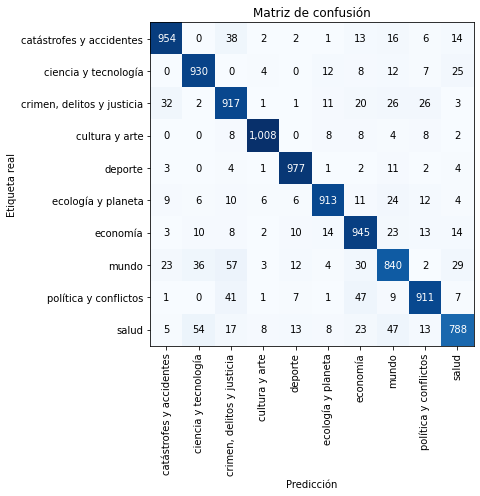

                            precision    recall  f1-score   support

  catástrofes y accidentes      0.926     0.912     0.919      1046
      ciencia y tecnología      0.896     0.932     0.914       998
crimen, delitos y justicia      0.834     0.883     0.857      1039
            cultura y arte      0.973     0.964     0.968      1046
                   deporte      0.950     0.972     0.961      1005
        ecología y planeta      0.938     0.912     0.925      1001
                  economía      0.854     0.907     0.879      1042
                     mundo      0.830     0.811     0.820      1036
     política y conflictos      0.911     0.889     0.900      1025
                     salud      0.885     0.807     0.845       976

                  accuracy                          0.899     10214
                 macro avg      0.900     0.899     0.899     10214
              weighted avg      0.900     0.899     0.899     10214



In [18]:
from sklearn.metrics import confusion_matrix, classification_report

def plot_confusion_matrix(cm, labels, cmap=plt.cm.Blues):
    fig, ax = plt.subplots(figsize=(7, 7), tight_layout=True)
    ax.imshow(cm, interpolation='nearest', cmap=cmap)
    for i in range(cm.shape[1]):
        for j in range(cm.shape[0]):
            ax.text(j, i, "{:,}".format(cm[i, j]), 
                    horizontalalignment="center", verticalalignment="center",
                    color="white" if cm[i, j] > np.amax(cm)/2 else "black")
    ax.set_title("Matriz de confusión")
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation='vertical')
    plt.yticks(tick_marks, labels)
    plt.ylabel('Etiqueta real')
    plt.xlabel('Predicción')
    plt.show()

cm = confusion_matrix(y_true=y_test, y_pred=predicted)
plot_confusion_matrix(cm, labels=list(df['label'].unique()))
print(classification_report(y_test, predicted, digits=3))

De la matriz de confusión, podemos apreciar que la categoría que presenta mayor dificultad de clasificar son _Mundo_ y _Salud_.

El modelo presenta una precisión del 89%.